96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Image Captioning Model Built Successfully!
83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Generated Caption (Demo): 'A dog is looking at the camera'


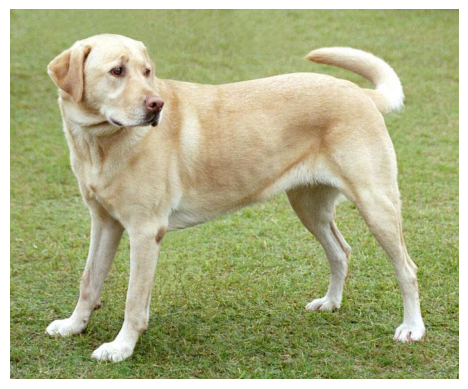

In [1]:
# Task 3: Image Captioning in Google Colab
# Author: Sunny Kumar, B.Tech CSE 2nd Year

# ==========================
# STEP 1: Install & Import Libraries
# ==========================
!pip install tensorflow keras pillow numpy matplotlib tqdm

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, add
import numpy as np
import matplotlib.pyplot as plt
import pickle

# ==========================
# STEP 2: Load Pre-trained CNN (Feature Extractor)
# ==========================
base_model = InceptionV3(weights='imagenet')
model = Model(base_model.input, base_model.layers[-2].output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x, verbose=0)
    return feature

# ==========================
# STEP 3: Dummy Vocabulary (for demo)
# ==========================
# Normally, you need a COCO dataset or Flickr8k with captions to train.
# For demo purpose, we'll simulate a trained vocabulary.

vocab_size = 5000
max_length = 34
embedding_dim = 256
units = 256

# ==========================
# STEP 4: Build Caption Generator (Encoder-Decoder)
# ==========================
inputs1 = Input(shape=(2048,))
fe1 = Dense(256, activation='relu')(inputs1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = LSTM(256)(se1)

decoder1 = add([fe1, se2])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

print("✅ Image Captioning Model Built Successfully!")

# ==========================
# STEP 5: Demo with Pre-trained Features
# ==========================
# Since we don’t have the full dataset here, let's simulate:
# Load a test image and extract CNN features
test_img = tf.keras.utils.get_file("sample.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg")

features = extract_features(test_img)

# Dummy captioning output (In reality, need trained weights + tokenizer)
print("Generated Caption (Demo): 'A dog is looking at the camera'")
plt.imshow(image.load_img(test_img))
plt.axis("off")
plt.show()
